In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
from RobustRandomForest import RobustRandomForest
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from math import floor

# Экспериментальные данные

In [2]:
omega = 0.1
n = 500

X = np.linspace(-1, 1, n)
y = X**2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

X_train = pd.DataFrame(data = {'X':X_train})
X_test = pd.DataFrame({'X':X_test})

Y_train = MaxAbsScaler().fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_train = pd.Series(Y_train)

Y_test = MaxAbsScaler().fit_transform(Y_test.reshape(-1, 1)).flatten()
Y_test = pd.Series(Y_test)

for i in range(Y_train.shape[0]):
    if i % 62 == 0:
        Y_train[i] += np.random.randint(-2, 2)
    else:
        Y_train[i] += np.random.normal(0, omega)

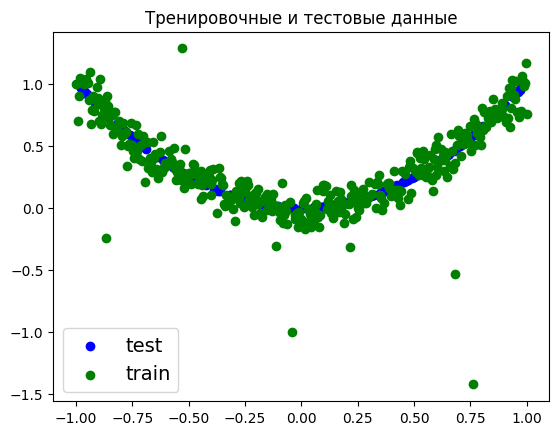

In [3]:
plt.title(f'Тренировочные и тестовые данные')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_train, Y_train, color='g', label='train')
plt.legend(fontsize=14)
plt.show()

## Случайный лес из sklearn

In [4]:
sk_rf = RandomForestRegressor(n_jobs=-1)
sk_rf.fit(X_train, Y_train)
sk_rf_pred = sk_rf.predict(X_test)
print(f'Точность mae sk_rf: {mean_absolute_error(sk_rf_pred, Y_test)}')

Точность mae sk_rf: 0.101118136980764


## Кастомный случайный лес

In [5]:
rrf = RobustRandomForest(n_jobs=-1, regression=True)
rrf.fit(X_train, Y_train)
rrf_pred = rrf.predict(X_test)
print(f'Точность mae rrf: {mean_absolute_error(rrf_pred, Y_test)}')

Точность mae rrf: 0.10088757233583567


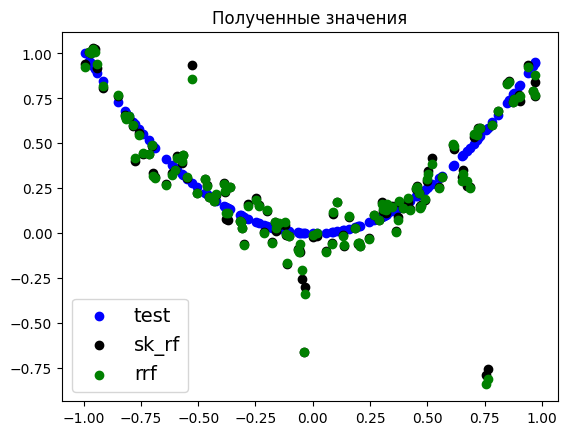

In [6]:
plt.title(f'Полученные значения')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, rrf_pred, color='g', label='rrf')
plt.legend(fontsize=14)
plt.show()

## Случайный лес с потерями Хубера

In [7]:
delta = 0.005
huber_rrf = RobustRandomForest(n_jobs=-1, regression=True, delta=delta)
huber_rrf.fit(X_train, Y_train)
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.08914697861927777


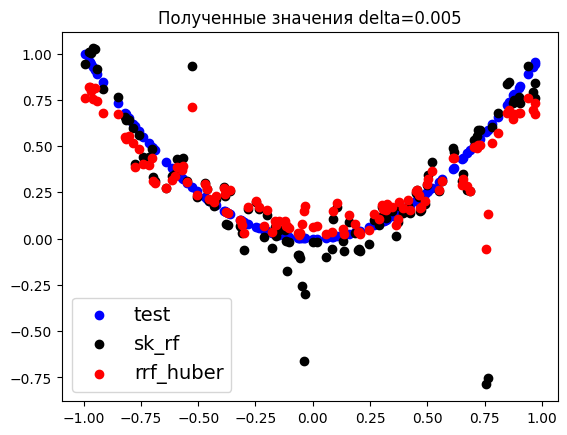

In [8]:
plt.title(f'Полученные значения delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

## Случайный лес с потерями Тьюки

In [9]:
delta = 0.005
tukey_rrf = RobustRandomForest(n_jobs=-1, regression=True, delta=delta)
tukey_rrf.fit(X_train, Y_train)
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae tukey_rrf: 0.10085317380122968


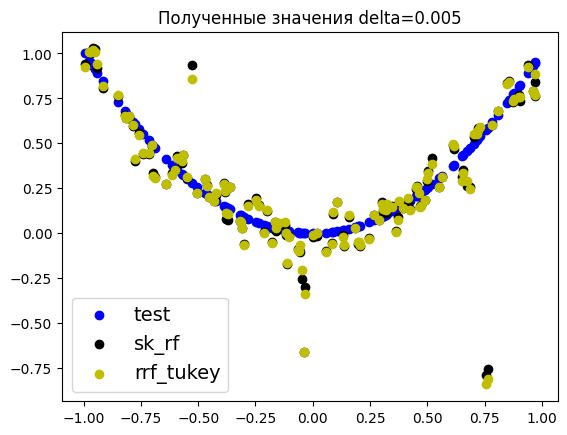

In [10]:
plt.title(f'Полученные значения delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

# Результаты случайного леса с потерями Хубера и Тьюки при разных значениях delta

## delta = 0.0001

In [11]:
delta = 0.0001

huber_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
huber_rrf.fit(X_train, Y_train)
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

tukey_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
tukey_rrf.fit(X_train, Y_train)
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.08158695263859007
Точность mae tukey_rrf: 0.10088849160897047


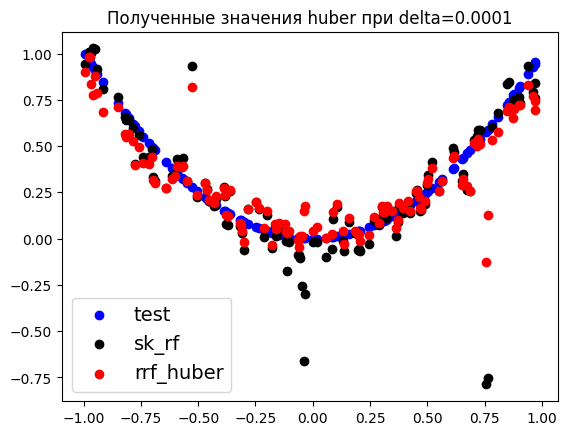

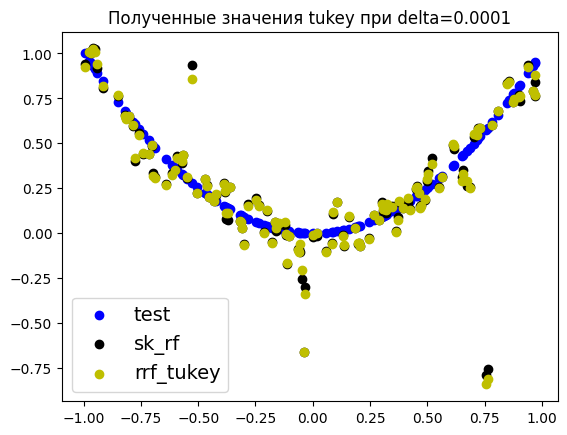

In [12]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.01

In [13]:
delta = 0.01

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.09513057512952344
Точность mae tukey_rrf: 0.10075531250774658


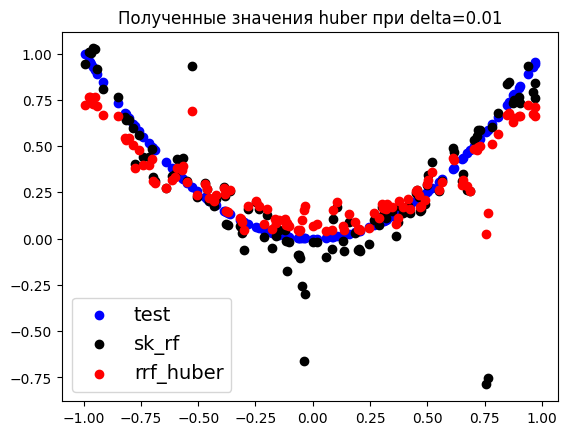

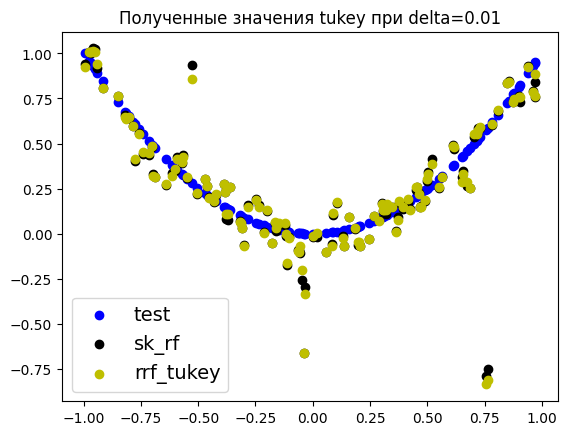

In [14]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.05

In [15]:
delta = 0.05

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.12129447799004317
Точность mae tukey_rrf: 0.09803107542542452


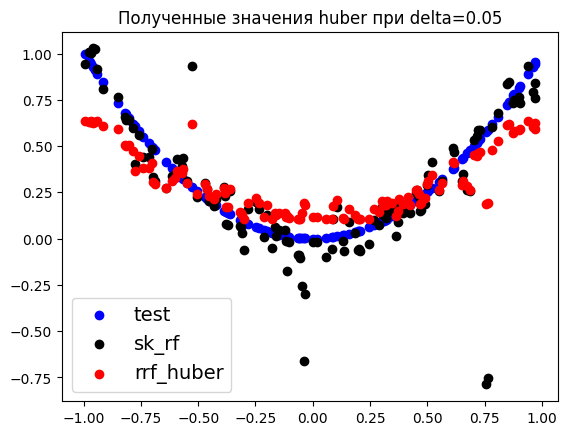

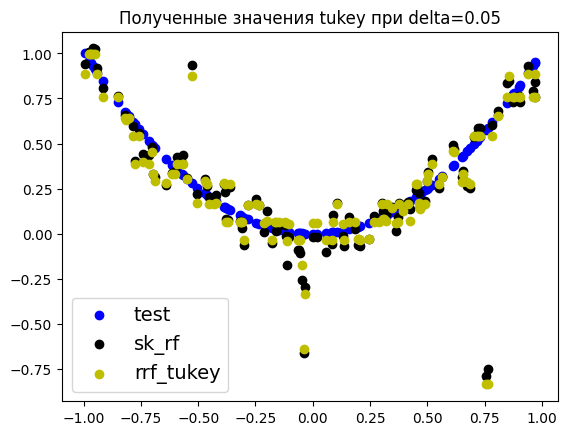

In [16]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.1

In [17]:
delta = 0.1

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.14153339207381763
Точность mae tukey_rrf: 0.10976470794362422


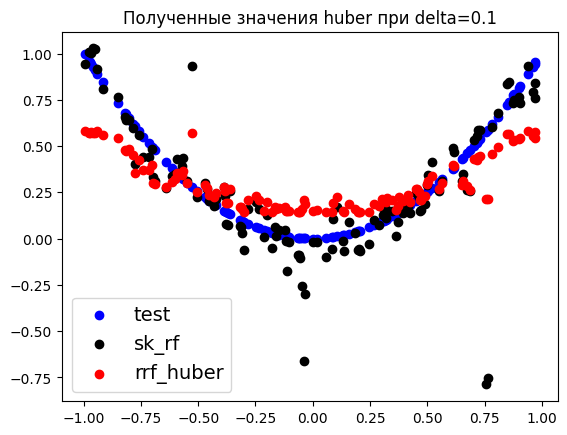

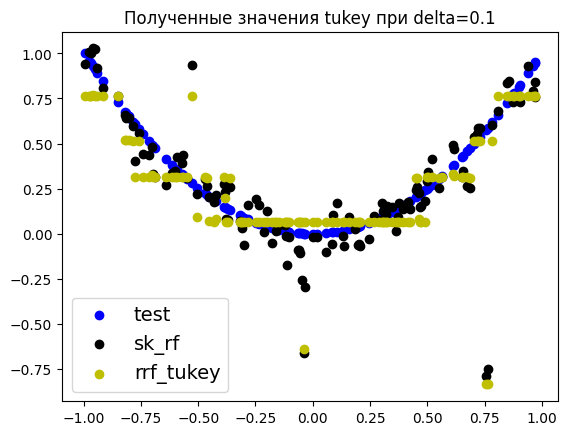

In [18]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

## delta = 0.25

In [19]:
delta = 0.25

huber_rrf.delta = delta
huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
print(f'Точность mae huber_rrf: {mean_absolute_error(huber_rrf_pred, Y_test)}')

tukey_rrf.delta = delta
tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
print(f'Точность mae tukey_rrf: {mean_absolute_error(tukey_rrf_pred, Y_test)}')

Точность mae huber_rrf: 0.1803447030973694
Точность mae tukey_rrf: 0.17107218282647485


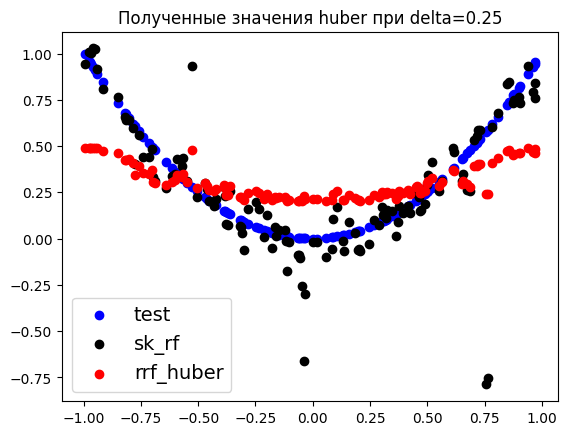

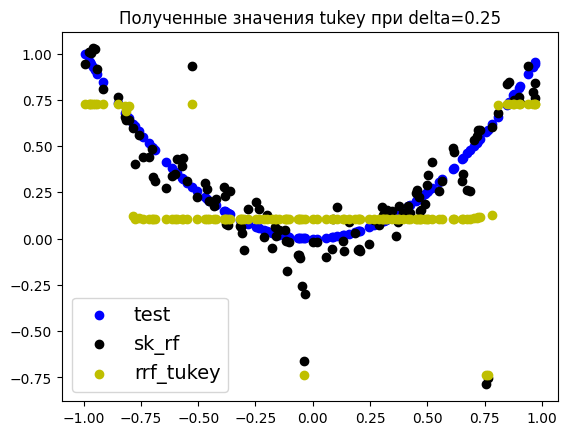

In [20]:
plt.title(f'Полученные значения huber при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, huber_rrf_pred, color='r', label='rrf_huber')
plt.legend(fontsize=14)
plt.show()

plt.title(f'Полученные значения tukey при delta={delta}')
plt.scatter(X_test, Y_test, color='b', label='test')
plt.scatter(X_test, sk_rf_pred, color='black', label='sk_rf')
plt.scatter(X_test, tukey_rrf_pred, color='y', label='rrf_tukey')
plt.legend(fontsize=14)
plt.show()

# Тест на реальных данных

In [210]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

Y_train = MaxAbsScaler().fit_transform(Y_train.to_numpy().reshape(-1, 1)).flatten()
Y_train = pd.Series(Y_train)
Y_test = MaxAbsScaler().fit_transform(Y_test.to_numpy().reshape(-1, 1)).flatten()
Y_test = pd.Series(Y_test)

huber_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
huber_rrf.fit(X_train, Y_train)

tukey_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
tukey_rrf.fit(X_train, Y_train)

In [213]:
mae = []
n = 100
deltas = np.linspace(0.0005, 0.5, n)

for delta in deltas:

    huber_rrf.delta = delta
    huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
    mae.append(mean_absolute_error(huber_rrf_pred, Y_test))
    
    tukey_rrf.delta = delta
    tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
    mae.append(mean_absolute_error(tukey_rrf_pred, Y_test))

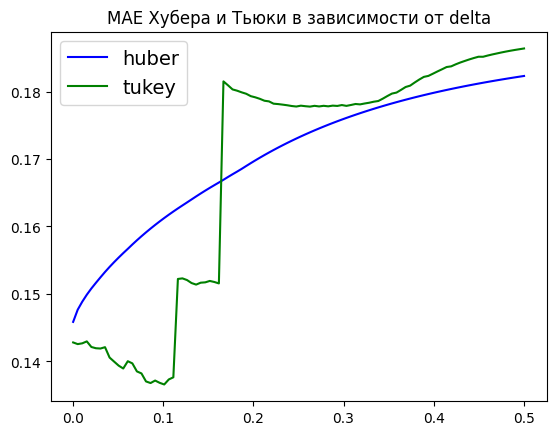

In [214]:
plt.title(f'MAE Хубера и Тьюки в зависимости от delta')
plt.plot(deltas, mae[0: n*2: 2], color='b', label='huber')
plt.plot(deltas, mae[1: n*2: 2], color='g', label='tukey')
plt.legend(fontsize=14)
plt.show()

# Сравение с sklearn

In [137]:
mae = []
n = 50
delta=0.001
for i in range(n):
    print(f'{round((i+1)/n*100, 1)}%')
    X, y = load_diabetes(return_X_y=True, as_frame=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y)

    Y_train = MaxAbsScaler().fit_transform(Y_train.to_numpy().reshape(-1, 1)).flatten()
    Y_train = pd.Series(Y_train)
    Y_test = MaxAbsScaler().fit_transform(Y_test.to_numpy().reshape(-1, 1)).flatten()
    Y_test = pd.Series(Y_test)

    huber_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
    huber_rrf.fit(X_train, Y_train)
    huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
    mae.append(mean_absolute_error(huber_rrf_pred, Y_test))

    tukey_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
    tukey_rrf.fit(X_train, Y_train)
    tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
    mae.append(mean_absolute_error(tukey_rrf_pred, Y_test))
    
    sk_rf = RandomForestRegressor(n_jobs=-1)
    sk_rf.fit(X_train, Y_train)
    sk_rf_pred = sk_rf.predict(X_test)
    mae.append(mean_absolute_error(sk_rf_pred, Y_test))

2.0%
4.0%
6.0%
8.0%
10.0%
12.0%
14.0%
16.0%
18.0%
20.0%
22.0%
24.0%
26.0%
28.0%
30.0%
32.0%
34.0%
36.0%
38.0%
40.0%
42.0%
44.0%
46.0%
48.0%
50.0%
52.0%
54.0%
56.0%
58.0%
60.0%
62.0%
64.0%
66.0%
68.0%
70.0%
72.0%
74.0%
76.0%
78.0%
80.0%
82.0%
84.0%
86.0%
88.0%
90.0%
92.0%
94.0%
96.0%
98.0%
100.0%


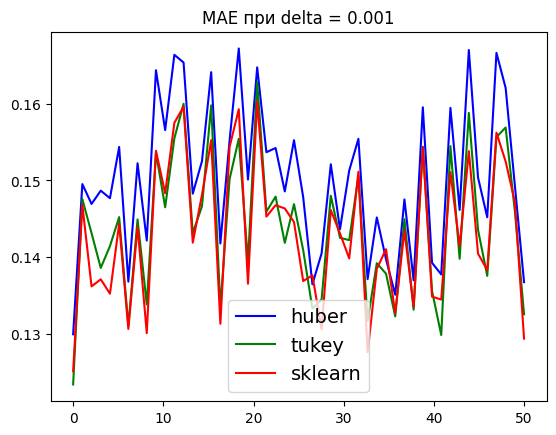

In [138]:
plt.title(f'MAE при delta = {delta}')
plt.plot(np.linspace(0, n, n), mae[0: n*3: 3], color='b', label='huber')
plt.plot(np.linspace(0, n, n), mae[1: n*3: 3], color='g', label='tukey')
plt.plot(np.linspace(0, n, n), mae[2: n*3: 3],color='r', label='sklearn')
plt.legend(fontsize=14)
plt.show()

# Генерируем эксперименты с вбросами

In [9]:
n_exp = 50
omega = 0.1
n = 500
delta = 0.005
mae = []

for j in range(n_exp):

    X = np.linspace(-1, 1, n)
    y = X**2
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

    X_train = pd.DataFrame(data = {'X':X_train})
    X_test = pd.DataFrame({'X':X_test})

    Y_train = MaxAbsScaler().fit_transform(Y_train.reshape(-1, 1)).flatten()
    Y_train = pd.Series(Y_train)

    Y_test = MaxAbsScaler().fit_transform(Y_test.reshape(-1, 1)).flatten()
    Y_test = pd.Series(Y_test)

    for i in range(Y_train.shape[0]):
        if i % floor(n*12/100) == 0:
            Y_train[i] += np.random.randint(-2, 2)
        else:
            Y_train[i] += np.random.normal(0, omega)

    huber_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
    huber_rrf.fit(X_train, Y_train)
    huber_rrf_pred = huber_rrf.predict(X_test, optimization='huber')
    mae.append(mean_absolute_error(huber_rrf_pred, Y_test))

    tukey_rrf = RobustRandomForest(n_jobs=-1, regression = True, delta=delta)
    tukey_rrf.fit(X_train, Y_train)
    tukey_rrf_pred = tukey_rrf.predict(X_test, optimization='tukey')
    mae.append(mean_absolute_error(tukey_rrf_pred, Y_test))
    
    sk_rf = RandomForestRegressor(n_jobs=-1)
    sk_rf.fit(X_train, Y_train)
    sk_rf_pred = sk_rf.predict(X_test)
    mae.append(mean_absolute_error(sk_rf_pred, Y_test))

    print(f'{j+1}.0%')

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%


## Средние значения MAE

In [12]:
print(f'Mean MAE huber: {np.mean(mae[0: n_exp*3: 3])}')
print(f'Mean MAE tukey: {np.mean(mae[1: n_exp*3: 3])}')
print(f'Mean MAE sk_learn: {np.mean(mae[2: n_exp*3: 3])}')

Mean MAE huber: 0.08341419403505651
Mean MAE tukey: 0.08345452156949601
Mean MAE sk_learn: 0.08470298221862475


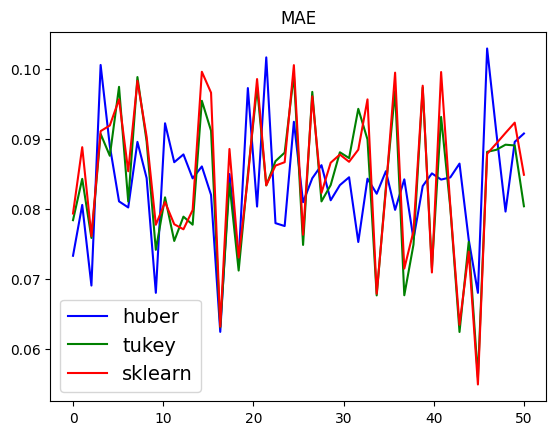

In [11]:
plt.title(f'MAE')
plt.plot(np.linspace(0, n_exp, n_exp), mae[0: n_exp*3: 3], color='b', label='huber')
plt.plot(np.linspace(0, n_exp, n_exp), mae[1: n_exp*3: 3], color='g', label='tukey')
plt.plot(np.linspace(0, n_exp, n_exp), mae[2: n_exp*3: 3], color='r', label='sklearn')
plt.legend(fontsize=14)
plt.show()